In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns 
import wordcloud 
%matplotlib inline

In [11]:
df = pd.read_csv('Corrected_Data.csv',encoding='latin-1') 

In [12]:
df

,MinOrder,City,Name,Delivery_Min,Delivery_Max,Delivery_Money,Money,Sushi,Burger,Salad,...,Ice_cream,Brunch,Hummus,Crepe,Asian,Homemade,Meat_fish,Kids_meals,Kids,Rate
0,50,0,Burger King | Ashdod,20.0,30.0,12,3,0,1,0,...,0,0,0,0,0,0,0,0,0,8.0
1,50,0,Ruben | Ashdod,25.0,35.0,12,2,0,1,0,...,0,0,0,0,0,0,0,0,0,8.2
2,50,0,Schnitzel Factory,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.6
3,50,0,Pita Basta | Ashdod,20.0,30.0,12,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.4
4,50,0,Del Pesto | Sea Mall,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,50,11,B Burger | Yavne,20.0,30.0,12,2,0,1,0,...,0,0,0,0,0,0,0,0,0,8.6
2023,50,11,Ami's Hummus,20.0,30.0,14,3,0,0,1,...,0,0,1,0,0,0,0,0,0,9.2
2024,50,11,Haderech Lalehem | Yavne,20.0,30.0,10,2,0,0,1,...,0,0,0,0,0,0,0,0,0,8.8
2025,50,11,CafÃÂ© Greg | Yavne,20.0,30.0,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.2


In [5]:
df.head()

,MinOrder,City,Name,Delviry_Min,Delviry_Max,Delivery_Money,Money,Sushi,Burger,Salad,...,Ice_cream,Brunch,Hummus,Crepe,Asian,Homemade,Meat_fish,Kids_meals,Kids,Rate
0,50,0,Burger King | Ashdod,20.0,30.0,12,3,0,1,0,...,0,0,0,0,0,0,0,0,0,8.0
1,50,0,Ruben | Ashdod,25.0,35.0,12,2,0,1,0,...,0,0,0,0,0,0,0,0,0,8.2
2,50,0,Schnitzel Factory,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.6
3,50,0,Pita Basta | Ashdod,20.0,30.0,12,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.4
4,50,0,Del Pesto | Sea Mall,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.2


In [126]:
mycolors = ['#002856', '#EAC71B']
category=df.columns[7:46]
sumCategory=[]
for c in category:
    sumCategory.append(df[c].sum())


<font color='black'><font size="6">**The amount of categories in all the restaurants in Wolt -** </font></font>It can be seen that the leading categories are kosher,mediterranean,salad and dessert




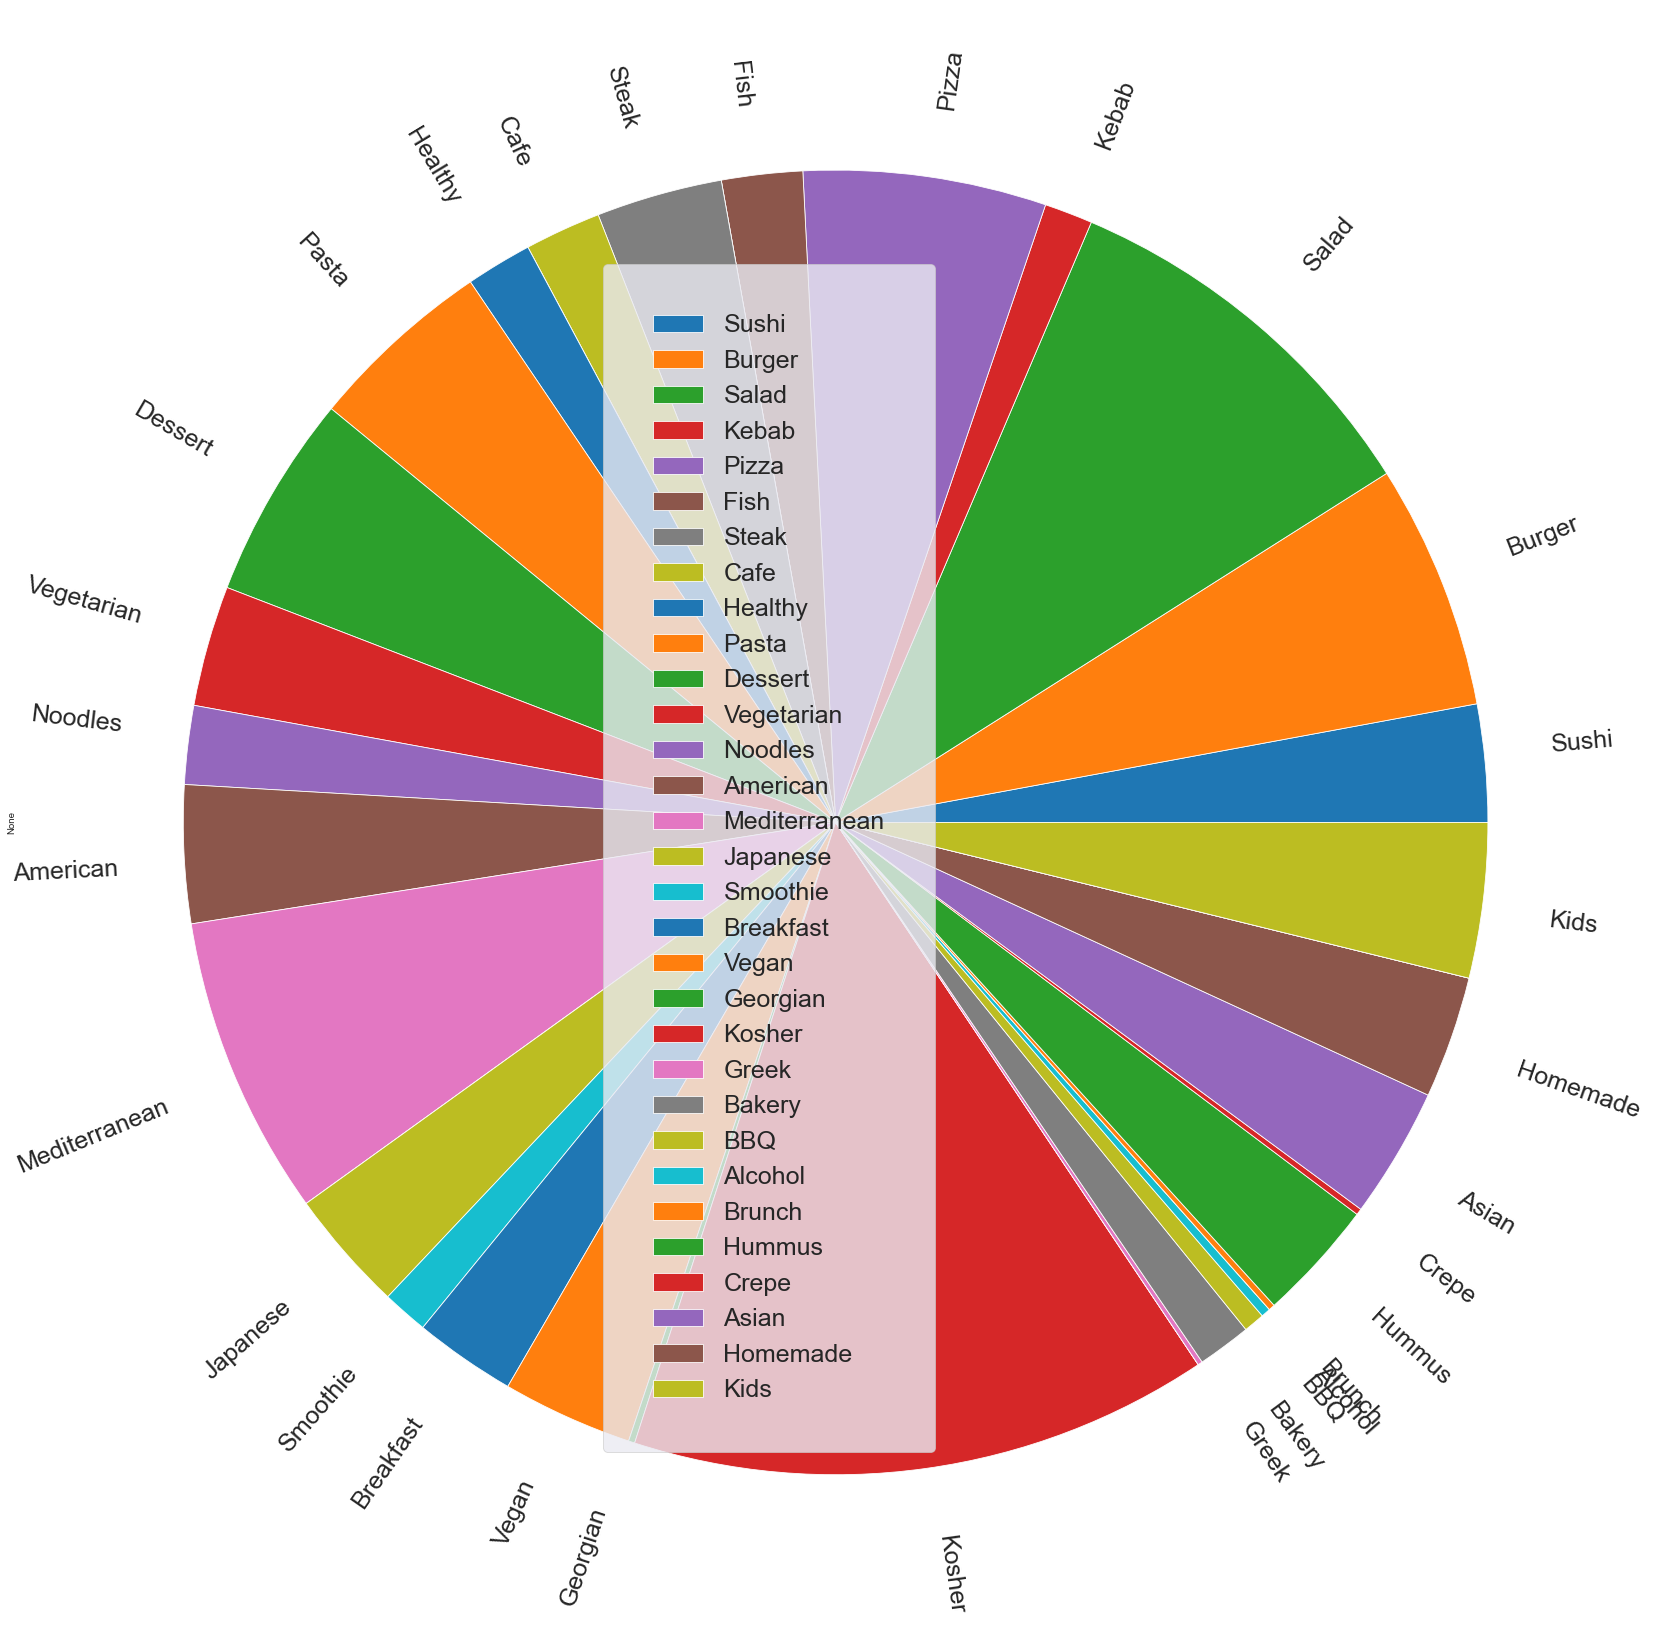

In [130]:
sr=pd.Series(sumCategory,index=category)
sr.plot(kind="pie",figsize=(30,30),textprops={'fontsize': 25},rotatelabels=True)
plt.legend(,loc=2,prop={'size': 25},bbox_to_anchor=(0.35, 0.85), borderpad=2)




<font color='black'><font size="6">**How  delivery money affects on rate -** </font></font>It can be seen that in most restaurants the payment for delivery is 12 NIS and that there is no clear connection between the two properties


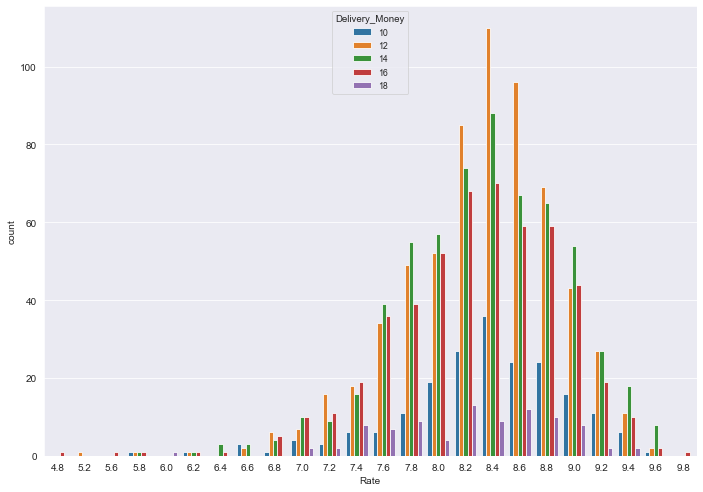

In [11]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_context("paper",rc={"font.size":2})
g=sns.countplot(x="Rate",hue="Delivery_Money",data=df,ax=ax)




<font color='black'><font size="6">**Description of restaurants by cities and by money-** </font></font>It can be seen that In Ashdod(0), for example, the restaurants that ranked 9 have the lowest payment compared to Netanya (11), where all restaurants have a medium payment.The outliers are characterized as very expensive / very cheap restaurants so we chose to leave them in order to examine their properties as well.


<AxesSubplot:xlabel='City', ylabel='Rate'>

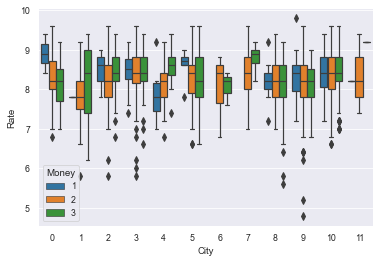

In [131]:
 sns.boxplot(y="Rate",x="City",hue="Money",data=df)


<font color='black'><font size="6">**connections between Kosher,Alcohol,Salad,Rate and Money-** </font></font>It can be seen that There is no connections between the properties as we expected there to be for example between kosher and rating


<AxesSubplot:>

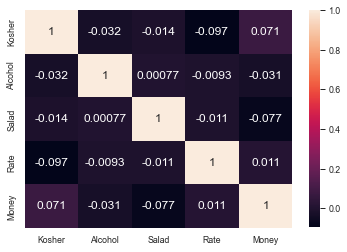

In [136]:
pok2 = pd.DataFrame(df, columns = ["Kosher","Alcohol","Salad","Rate","Money"])
sns.heatmap(pok2.corr(), annot=True,annot_kws={"size": 12})


<font color='black'><font size="6">**connections between City,Delviry_Min,Delviry_Max,Delivery_Money,Money and rate
-** </font></font>It can be seen that There is no connections between the properties,The only connection is between delivery money and delivery time

<AxesSubplot:>

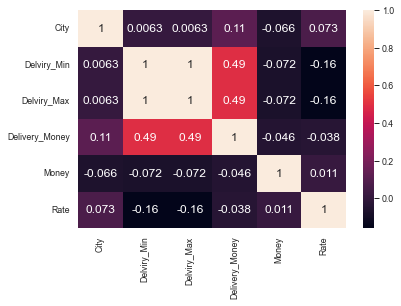

In [139]:
pok3 = pd.DataFrame(df, columns=["City",'Delviry_Min','Delviry_Max','Delivery_Money','Money',"Rate"])
sns.heatmap(pok3.corr(), annot=True,annot_kws={"size": 12})


<font color='black'><font size="6">**connections between Delivery_Min, Delivery_Max  ans Delivery_Money
-** </font></font>It can be seen that the more expensive the shipping fee, the longer the shipping time in most cases

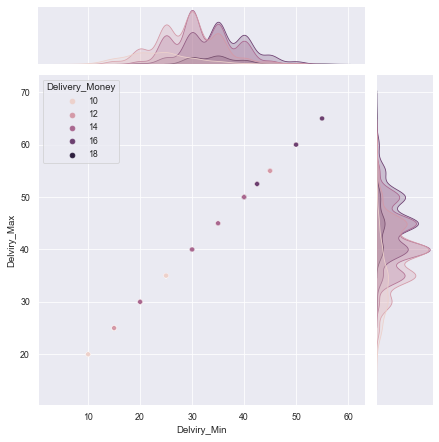

In [141]:
sns.jointplot(data=df, x="Delviry_Min", y="Delviry_Max", hue="Delivery_Money")

In [7]:
from wordcloud import WordCloud
from PIL import Image


<font color='black'><font size="6">**Top 100  rated restaurants
-** </font></font>

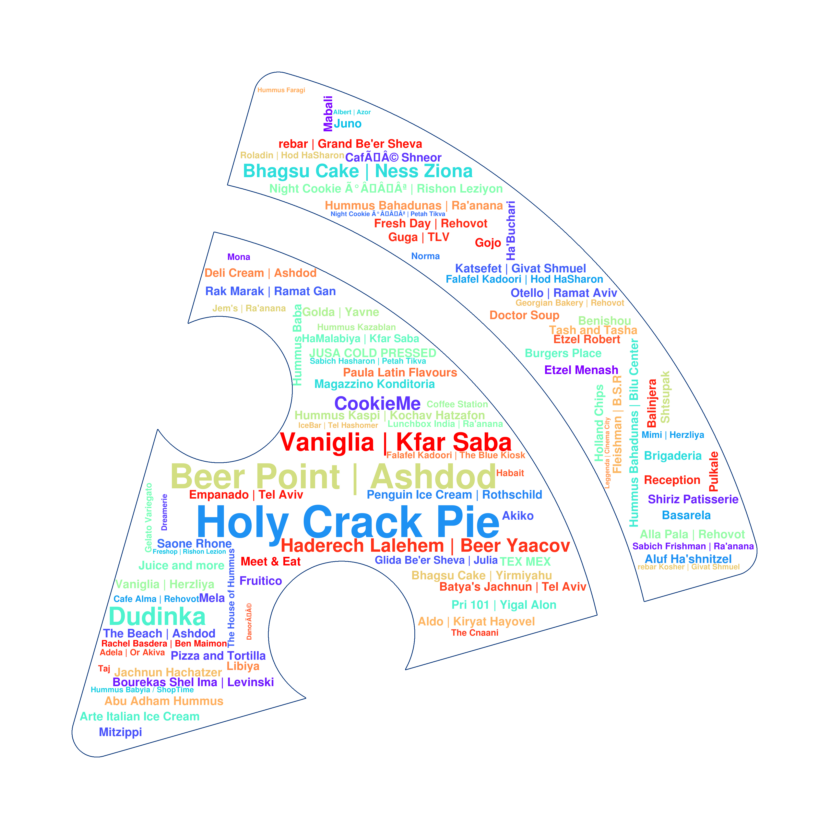

In [9]:
text = pd.Series(df["Rate"].values, index=df["Name"])


def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

    
    
image_file=Image.open("rocket.png")
image_file=image_file.convert('1')
rocket_mask = np.array(image_file)

transformed_rocket_mask = np.ndarray((rocket_mask.shape[0],rocket_mask.shape[1]), np.int32)

for i in range(len(rocket_mask)):
    transformed_rocket_mask[i] = list(map(transform_format, rocket_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_rocket_mask,contour_width=3,contour_color='#023075',colormap='rainbow',font_path= 'FreeSansBold.ttf')

wc=wc.generate_from_frequencies(text)
plt.figure(figsize=[20,15])

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
